# <font color='#3d59c6'> MD004 SESIÓN CLASIFICADOR NAIVE BAYES </font>

**MODELO**: Naive Bayes para detección de spam

 <font color='#134F5C'> Naive Bayes (NB) es un algoritmo de clasificación que usa datos de eventos pasados para calcuar la probabilidad de eventos futuros. Típicamente se emplea en problemas en los que contamos con una gran candidad de atributos y todos deben considerarse simultáneamente.</font>

**DATA**: En este ejemplo utilizaremos el dataset: **202601S3 Subject vs Spam.csv** con el cual crearemos el modelo y lo validaremos. Por otro lado tendremos un segundo fichero (**202601S3 Subject Ecommerce**) con una bateria de subjects que necesitaremos cribar respecto a si son válidos o no.

**OBJETIVO:** Vamos a crear un modelo que nos permita identificar la clasificación de un email en base al subject, indicando si es spam o por contra es ham y por lo tanto podrá llegar a la bandeja de entrada.
Una vez generado este modelo vamos a validar una batería de subjects preparados para diferentes campañas de eMailing y observaremos como quedan clasificados y hay alguno que se deba redefinir.

El objetivo es calcular eventos mutuamente incluyentes para el mismo test. Por atendiendo al ejemplo de SPAM:

- Spam e Inbox son categorías mutuamente excluyentes 

Depende de la probabilidad condicionada de los 2 eventos. En el ejemplo que estamos tratando imaginemos que P(Ahora) es independiente de P(Spam): En este caso sería fácil de calcular P(Ahora ∩ Spam) como P(Ahora) x P(Spam). La realidad es que P(Spam) y P(Ahora) están íntimamente relacionados. NB será la herramienta que utilizaremos para calcular las probabilidades condicionadas a posteriori:


$${P(Spam|Ahora)} =  P(Ahora|Spam) * P(Spam) / P(Ahora) $$

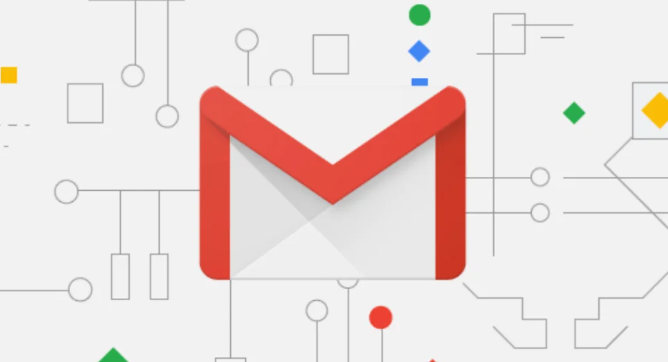

**PASOS:** 

0. Plantear estrategia
1. Trabajar fichero de texto: transformación del dataset
2. Generación del modelo
3. Validar modelo
4. Estimar cuantos de los subjects del fichero campañas eMailing son aptos para ser usados

**Fuente datos:** Recopilación de emails de diferentes cuentas

## <font color='#3d59c6'>  CARGA DE PACKAGES </font>

In [4]:
#install.packages('slam')
#install.packages('tm')
#install.packages('SnowballC')
#install.packages('gmodels')
#install.packages('wordcloud')
#install.packages("e1071")
library(e1071)
library(caret)
library(tm)
library(SnowballC)
library(wordcloud)
library(gmodels)
library(wordcloud)

## <font color='#3d59c6'>  CARGA DE DATOS </font>

- Variable dependiente (target) **type** (nos indica si google lo clasifica como spam o lo ha dejado llegar a la bandeja de entrada (inbox)
- Variables explicativas o predictoras:

    - **subject**

In [5]:
data_subject = read.csv(file='202601S3 Subject vs Spam.csv', header=TRUE, sep=';', dec=',')
head(data_subject)#de forma predefinida retorna las primeras 6 observations
tail(data_subject)#de forma predefinida retorna las últimas 6 observations

,type,subject
,<chr>,<chr>
1,spam,Tres cupones descuento para ti
2,spam,"¡Sorpresa! Shiseido ya está disponible, ¡aprovéchalo!"
3,spam,¡Oferta online! Precio fijo 24h sin subidas en luz y sin permanencia
4,inbox,4 semana septiembre plan de redes
5,inbox,Categorías contenido y fuentes 2
6,spam,Estamos de REBAJAS ⚡ ¡Solo 72 horas!


,type,subject
,<chr>,<chr>
601,spam,Tu plan Premium tiene un 60% de descuento
602,inbox,La inteligencia artificial será clave en la transformación de los servicios financieros
603,spam,"asociate a Emergencias Salud, 70% de descuento los 3 primeros meses + 30% de descuento los siguientes 4 meses"
604,inbox,Stage d'​innovation: DATOS + IA
605,inbox,12 valoracion y riesgo crediticio en colombia
606,spam,Las rebajas. Acaban. Hoy


## <font color='#3d59c6'>  EXPLORACION </font>

In [6]:
str(data_subject)

'data.frame':	606 obs. of  2 variables:
 $ type   : chr  "spam" "spam" "spam" "inbox" ...
 $ subject: chr  "Tres cupones descuento para ti" "¡Sorpresa! Shiseido ya está disponible, ¡aprovéchalo!" "¡Oferta online! Precio fijo 24h sin subidas en luz y sin permanencia" "4 semana septiembre plan de redes" ...


In [7]:
# Proporción de clases
round(prop.table(table(data_subject$type))*100, digits = 1)


inbox  spam 
 61.9  38.1 

In [8]:
# Establecemos el tipo de dato a factor
data_subject$type = factor(data_subject$type)
data_subject$type

[1] spam  spam  spam  inbox inbox spam  spam  spam  spam  spam  spam  spam 
 [13] spam  spam  spam  inbox spam  spam  spam  spam  spam  spam  spam  spam 
 [25] spam  spam  spam  spam  spam  spam  spam  spam  spam  inbox spam  spam 
 [37] spam  spam  spam  spam  spam  spam  spam  spam  spam  spam  spam  spam 
 [49] spam  spam  inbox spam  spam  inbox inbox spam  spam  spam  spam  inbox
 [61] inbox spam  spam  spam  inbox spam  spam  spam  spam  inbox inbox spam 
 [73] spam  spam  spam  spam  spam  spam  spam  spam  spam  inbox spam  spam 
 [85] inbox spam  spam  spam  spam  spam  inbox inbox spam  spam  spam  spam 
 [97] inbox inbox spam  spam  spam  spam  spam  spam  spam  spam  spam  spam 
[109] spam  inbox spam  spam  inbox inbox inbox spam  spam  spam  inbox spam 
[121] spam  spam  spam  spam  spam  inbox spam  spam  spam  spam  spam  spam 
[133] spam  spam  inbox spam  spam  spam  spam  inbox inbox spam  spam  spam 
[145] spam  spam  spam  spam  inbox spam  spam  spam  inbox spam  spam  spam 
[157] spam  spam  spam  inbox spam  inbox spam  spam  spam  inbox inbox inbox
[169] inbox inbox inbox inbox inbox inbox inbox inbox inbox inbox inbox inbox
[181] inbox inbox inbox inbox inbox inbox inbox inbox inbox inbox inbox inbox
[193] inbox inbox inbox inbox inbox inbox inbox inbox inbox inbox inbox inbox
[205] inbox inbox inbox inbox inbox inbox inbox inbox inbox inbox inbox inbox
[217] inbox inbox spam  inbox inbox inbox inbox inbox inbox inbox inbox inbox
[229] inbox inbox inbox inbox inbox inbox inbox inbox inbox inbox inbox inbox
[241] inbox inbox inbox inbox inbox inbox inbox inbox inbox inbox inbox inbox
[253] inbox inbox inbox inbox inbox inbox inbox inbox inbox inbox inbox inbox
[265] inbox inbox inbox inbox inbox inbox inbox inbox inbox inbox inbox inbox
[277] inbox inbox inbox inbox inbox inbox inbox inbox inbox inbox inbox inbox
[289] inbox inbox inbox inbox inbox inbox inbox inbox inbox inbox inbox inbox
[301] inbox inbox inbox inbox inbox inbox inbox inbox inbox inbox inbox inbox
[313] inbox inbox inbox inbox inbox inbox inbox inbox inbox inbox inbox inbox
[325] inbox spam  inbox inbox inbox inbox inbox inbox spam  spam  inbox inbox
[337] inbox inbox inbox inbox inbox inbox inbox inbox inbox inbox inbox inbox
[349] inbox inbox inbox inbox inbox inbox inbox inbox inbox inbox inbox inbox
[361] inbox inbox inbox inbox inbox inbox spam  spam  inbox inbox inbox inbox
[373] inbox inbox inbox inbox spam  inbox inbox inbox inbox inbox inbox inbox
[385] spam  inbox inbox inbox inbox inbox inbox inbox inbox inbox inbox inbox
[397] inbox inbox inbox inbox inbox inbox inbox inbox spam  inbox inbox inbox
[409] spam  spam  inbox spam  spam  inbox inbox inbox inbox inbox inbox spam 
[421] spam  spam  spam  spam  spam  spam  inbox spam  spam  spam  spam  inbox
[433] inbox spam  spam  inbox spam  spam  spam  inbox spam  spam  inbox spam 
[445] spam  spam  inbox spam  spam  spam  inbox inbox inbox spam  spam  spam 
[457] spam  spam  spam  inbox spam  spam  spam  spam  spam  spam  inbox spam 
[469] spam  spam  spam  inbox spam  spam  inbox inbox spam  inbox inbox spam 
[481] inbox inbox inbox inbox inbox inbox inbox inbox inbox inbox inbox inbox
[493] spam  spam  spam  spam  spam  spam  spam  spam  spam  spam  spam  spam 
[505] spam  spam  spam  spam  spam  spam  spam  spam  spam  spam  spam  spam 
[517] spam  spam  spam  spam  spam  spam  spam  spam  inbox inbox inbox inbox
[529] inbox inbox inbox inbox inbox inbox inbox inbox inbox inbox inbox inbox
[541] inbox inbox inbox inbox inbox inbox inbox inbox inbox inbox inbox inbox
[553] inbox inbox inbox inbox inbox inbox inbox inbox inbox inbox inbox inbox
[565] inbox inbox inbox inbox inbox inbox inbox inbox inbox inbox inbox inbox
[577] inbox inbox inbox inbox inbox inbox inbox inbox inbox inbox inbox inbox
[589] inbox inbox inbox inbox inbox spam  spam  spam  spam  spam  inbox inbox
[601] spam  inbox spam  inbox inbox spam 
Levels: inbox spam

## <font color='#3d59c6'>  TRANSFORMACIÓN Y LIMPIEZA DEL DATASET </font>

Nuestro objetivo en este punto será crear un mapa de palabras, analizar qué palabras se repiten más, etc 
Lo primero que haremos será aplicar la función VectorSource() esto nos tratará cada fila como si fuese un documento. Luego con VCorpus() alamcenaremos esta colección de "datos" (documentos).

**VENTAJAS**

- A nivel computacional los datos se guardan en la memoria, por lo que computacionalmente es más eficiente
- El tipo de almacenamiento corpus tiene funciones que nos permiten manipular textos de una forma eficiente con funciones predefinidas

In [9]:
data_corpus = VCorpus(VectorSource(data_subject$subject),readerControl = list(language = 'es'))
print(data_corpus)

<<VCorpus>>
Metadata:  corpus specific: 0, document level (indexed): 0
Content:  documents: 606


La transformación del texto se realiza utilizando la función tm_map() que nos va a permitir eliminar signos, acentos, espacios,...

In [10]:
# Esta transformación cambia todas las mayúsculas a minúsculas
data_corpus_clean = tm_map(data_corpus, content_transformer(tolower))
# Visualización de la instancia antes y después de la transformación
print(lapply(data_corpus[[1]][1], as.character))
print(lapply(data_corpus_clean[[1]][1], as.character))

$content
[1] "Tres cupones descuento para ti"

$content
[1] "tres cupones descuento para ti"



In [11]:
# Esta transformación retira números y palabras conectoras de lenguaje y a texto plano
data_corpus_clean = tm_map(data_corpus_clean, removeNumbers) 
data_corpus_clean = tm_map(data_corpus_clean, removeWords, stopwords("spanish"))

# Visualización de la instancia antes y después de la transformación
print(lapply(data_corpus[[1]][1], as.character))
print(lapply(data_corpus_clean[[1]][1], as.character))

$content
[1] "Tres cupones descuento para ti"

$content
[1] "tres cupones descuento  "



In [12]:
#Eliminamos los signos de puntuación
data_corpus_clean <- tm_map(data_corpus_clean, removePunctuation)
print(lapply(data_corpus[[1]][1], as.character))
print(lapply(data_corpus_clean[[1]][1], as.character))

$content
[1] "Tres cupones descuento para ti"

$content
[1] "tres cupones descuento  "



Esta función no elimina los signos “¡” y “¿”, creamos una función que nos ayude con la limpieza

In [13]:
# sustituye puntuaciones por espacios
replacePunctuation = function(x) {gsub('[[:punct:]]', ' ', x)}

data_corpus_clean = tm_map(data_corpus_clean, replacePunctuation)
# Visualización de la instancia antes y después de la transformación
print(lapply(data_corpus[[1]][1], as.character))
print(lapply(data_corpus_clean[[1]][1], as.character))

$content
[1] "Tres cupones descuento para ti"

[[1]]
[1] "tres cupones descuento  "



In [14]:
#Creamos una función que sustituya las letras con acentos por letras sin acentos
removeAccents = function(x) chartr('àáèéìíòóùú', 'aaeeiioouu', x)
data_corpus_clean = tm_map(data_corpus_clean, removeAccents)
print(lapply(data_corpus[[1]][1], as.character))
print(lapply(data_corpus_clean[[1]][1], as.character))

$content
[1] "Tres cupones descuento para ti"

[[1]]
[1] "tres cupones descuento  "



In [15]:
#Elimina los dobles espacios y los sustituye por un solo espacio
data_corpus_clean = tm_map(data_corpus_clean, stripWhitespace)
# Visualización de la instancia antes y después de la transformación
print(lapply(data_corpus[[1]][1], as.character))
print(lapply(data_corpus_clean[[1]][1], as.character))

$content
[1] "Tres cupones descuento para ti"

[[1]]
[1] "tres cupones descuento "



A través de tm_map podemos invocar a la función **stemDocument** con el objetivo de unificar aquellos términos que aportan la misma información (tienen la misma base semántica)

In [16]:
data_corpus_clean = tm_map(data_corpus_clean, stemDocument, 'spanish')
print(lapply(data_corpus[[1]][1], as.character))
print(lapply(data_corpus_clean[[1]][1], as.character))

$content
[1] "Tres cupones descuento para ti"

[[1]]
[1] "tres cupon descuent"



In [17]:
# especificando un vector de palabras comunes a ser eliminadas
data_corpus_clean = tm_map(data_corpus_clean, removeWords, c('los', 'las','si'))

In [18]:
#Transforma a documentos de texto plano
data_corpus_clean = tm_map(data_corpus_clean, PlainTextDocument)

In [19]:
for (i in (1:5))
{
    print(paste0("subject number ", i))
    print(lapply(data_corpus[[i]][1], as.character))
    print(lapply(data_corpus_clean[[i]][1], as.character))
}

[1] "subject number 1"
$content
[1] "Tres cupones descuento para ti"

$content
[1] "tres cupon descuent"

[1] "subject number 2"
$content
[1] "¡Sorpresa! Shiseido ya está disponible, ¡aprovéchalo!"

$content
[1] "sorpres shis dispon aprovechal"

[1] "subject number 3"
$content
[1] "¡Oferta online! Precio fijo 24h sin subidas en luz y sin permanencia"

$content
[1] "ofert onlin preci fij h sub luz permanent"

[1] "subject number 4"
$content
[1] "4 semana septiembre plan de redes"

$content
[1] "seman septiembr plan red"

[1] "subject number 5"
$content
[1] "Categorías contenido y fuentes 2"

$content
[1] "categori conten fuent"



## <font color='#3d59c6'> LO MISMO PERO DECLARANDO UNA FUNCIÓN </font>

Se incluye la función stemDocument >> A través de tm_map podemos invocar a la función stemDocument con el objetivo de unificar aquellos términos que aportan la misma información (tienen la misma base semántica)

In [20]:
replacePunctuation = function(x) {gsub('[[:punct:]]', ' ', x)}
removeAccents = function(x) chartr('àáèéìíòóùú', 'aaeeiioouu', x)

clean_corpus = function(corpus){
               data_corpus_clean = tm_map(corpus, content_transformer(tolower))
               data_corpus_clean = tm_map(data_corpus_clean, removeNumbers)   
               data_corpus_clean = tm_map(data_corpus_clean, removeWords, stopwords('spanish'))
               data_corpus_clean = tm_map(data_corpus_clean, removeWords, stopwords())        
               data_corpus_clean = tm_map(data_corpus_clean, removePunctuation)     
               data_corpus_clean = tm_map(data_corpus_clean, replacePunctuation)    
               data_corpus_clean = tm_map(data_corpus_clean, removeAccents)    
               data_corpus_clean = tm_map(data_corpus_clean, stripWhitespace)      
               data_corpus_clean = tm_map(data_corpus_clean, removeWords, c('los', 'las','si','the'))   
               data_corpus_clean = tm_map(data_corpus_clean, stemDocument, 'spanish')   
               data_corpus_clean = tm_map(data_corpus_clean, PlainTextDocument)   
  return(data_corpus_clean)
}

In [21]:
data_corpus = VCorpus(VectorSource(data_subject$subject),readerControl = list(language = 'es'))
data_corpus_clean = clean_corpus(data_corpus) 
print(lapply(data_corpus[[i]][1], as.character))
print(lapply(data_corpus_clean[[i]][1], as.character))

$content
[1] "Categorías contenido y fuentes 2"

$content
[1] "categori conten fuent"



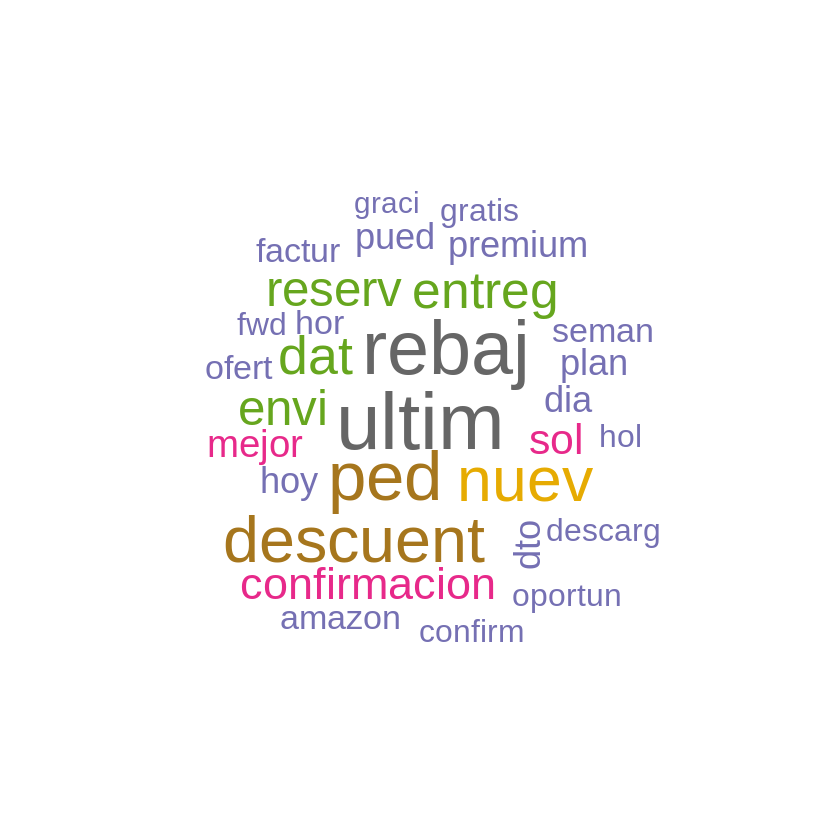

In [22]:
wordcloud(data_corpus_clean, max.words = 30, random.order = F, colors = brewer.pal(name = "Dark2", n = 8))

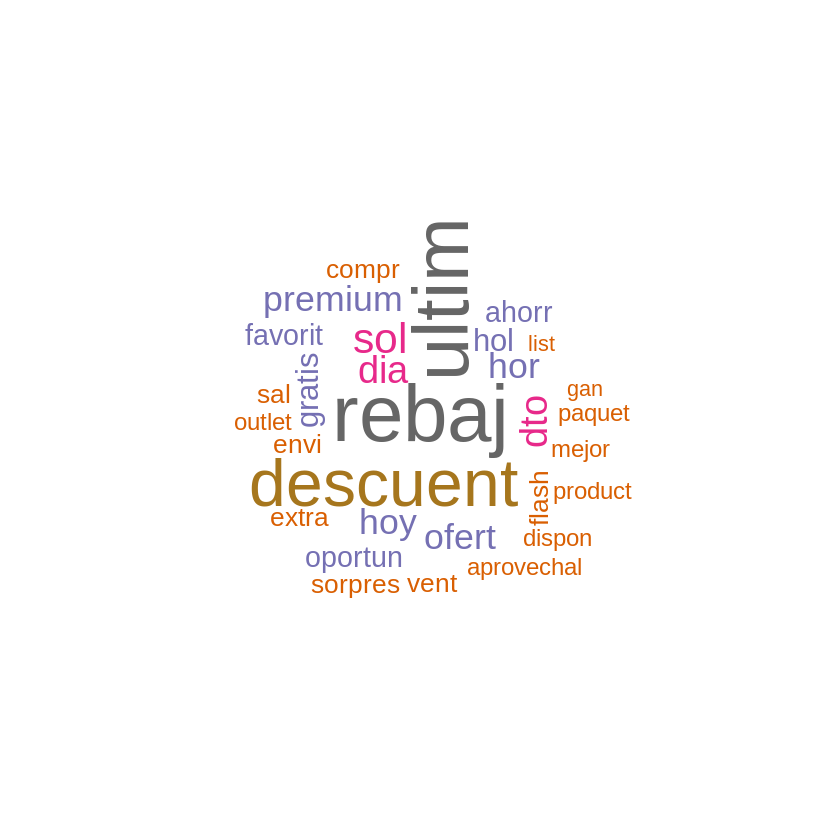

In [23]:
data_subject_spam = subset(data_subject, data_subject$type =='spam')
data_corpus_spam = VCorpus(VectorSource(data_subject_spam$subject),readerControl = list(language = 'es'))
data_corpus_clean_spam = clean_corpus(data_corpus_spam) 

wordcloud(data_corpus_clean_spam, max.words = 30, random.order = F, colors = brewer.pal(name = "Dark2", n = 8))

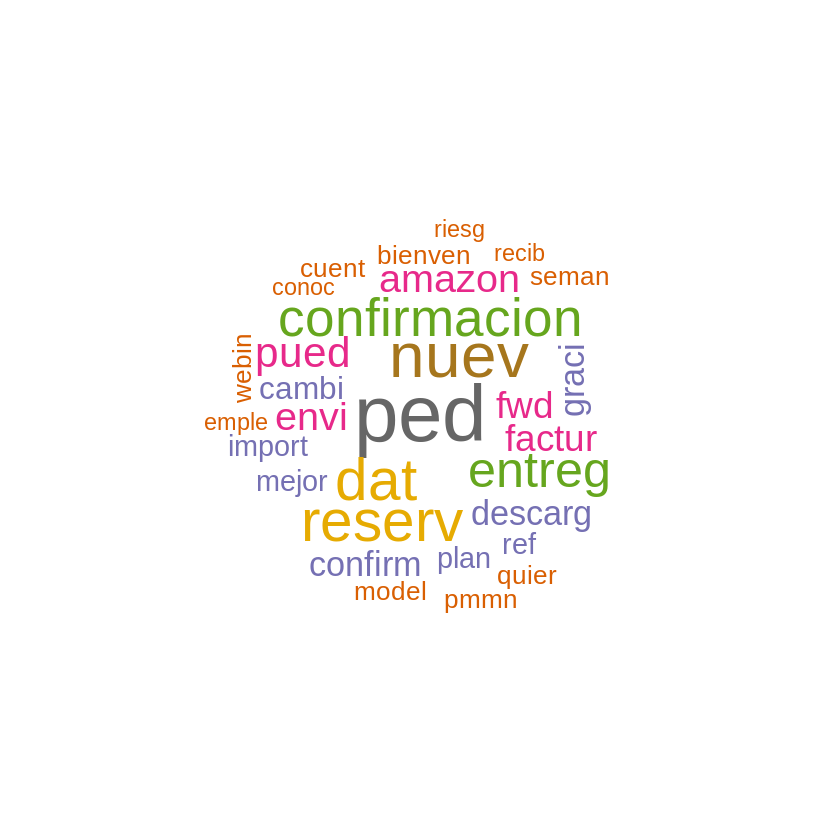

In [24]:
data_subject_ham = subset(data_subject, data_subject$type =='inbox')
data_corpus_ham = VCorpus(VectorSource(data_subject_ham$subject),readerControl = list(language = 'es'))
data_corpus_clean_ham = clean_corpus(data_corpus_ham) 

wordcloud(data_corpus_clean_ham, max.words = 30, random.order = F, colors = brewer.pal(name = "Dark2", n = 8))

## <font color='#3d59c6'>  SEPARACIÓN TRAIN & TEST </font>

Ahora transformaremos cada mensaje en palabras independientes para construir la estructura del análisis mediante una matrix compuesta por:

- Las columnas son la unión de todas las palabras definidas en el corpus
- Las filas son cada una de las instancias de los mensajes tal y como viene definido en el dataset entrante
- Los valores son el número de veces que se repite cada palabra en cada mensaje

La matriz generada estará compuesta principalmente de instancias de valor 0. La función *DocumentTermMatrix* nos ayudará a generar este conjunto.

In [25]:
dtm = DocumentTermMatrix(data_corpus_clean)
dtm

<<DocumentTermMatrix (documents: 606, terms: 1236)>>
Non-/sparse entries: 2400/746616
Sparsity           : 100%
Maximal term length: 26
Weighting          : term frequency (tf)

In [26]:
str(dtm)

List of 6
 $ i       : int [1:2400] 1 1 1 2 2 2 2 3 3 3 ...
 $ j       : int [1:2400] 303 331 1156 61 360 1046 1071 494 689 800 ...
 $ v       : num [1:2400] 1 1 1 1 1 1 1 1 1 1 ...
 $ nrow    : int 606
 $ ncol    : int 1236
 $ dimnames:List of 2
  ..$ Docs : chr [1:606] "character(0)" "character(0)" "character(0)" "character(0)" ...
  ..$ Terms: chr [1:1236] "abrig" "acab" "academ" "acas" ...
 - attr(*, "class")= chr [1:2] "DocumentTermMatrix" "simple_triplet_matrix"
 - attr(*, "weighting")= chr [1:2] "term frequency" "tf"


In [27]:
as.matrix(dtm)

,abrig,acab,academ,acas,acces,accion,account,acept,acqustic,activ,⋯,wow,xhekpon,xnoagn,xtrem,xxl,yahari,yesss,ysan,yummy,zapat
character(0),0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
character(0),0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
character(0),0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
character(0),0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
character(0),0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
character(0),0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
character(0),0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
character(0),0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
character(0),0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
character(0),0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [28]:
#Establecemos las frecuencias de cada término sumando las columnas 
termFreq = colSums(as.matrix(dtm))
head(termFreq)

abrig   acab academ   acas  acces accion 
     1      3      1      1      1      2

In [29]:
#Creamos el nuevo data set
tabla_frec = data.frame(term = names(termFreq), freq = termFreq)
head(tabla_frec)

,term,freq
,<chr>,<dbl>
abrig,abrig,1
acab,acab,3
academ,academ,1
acas,acas,1
acces,acces,1
accion,accion,2


In [30]:
#Ordenamos por frecuencias descendientes
tabla_frec = tabla_frec[order(-tabla_frec[,2]),]
head(tabla_frec)

,term,freq
,<chr>,<dbl>
ultim,ultim,32
rebaj,rebaj,30
ped,ped,27
descuent,descuent,25
nuev,nuev,24
dat,dat,20


In [31]:
set.seed(555)

# Creamos el data partition de la función caret con un 70 - 30 split
inTrain <- createDataPartition(y = data_subject$type
                                  , p = .70
                                  , list = FALSE
                                  , times = 1)
# Definitmos los datasets originales entre train y test
data.train<-data_subject[inTrain,]
data.test<-data_subject[-inTrain,]
# Revisamos el split
str(data.train)
str(data.test)

'data.frame':	425 obs. of  2 variables:
 $ type   : Factor w/ 2 levels "inbox","spam": 2 2 2 1 2 2 2 2 2 1 ...
 $ subject: chr  "Tres cupones descuento para ti" "¡Sorpresa! Shiseido ya está disponible, ¡aprovéchalo!" "¡Oferta online! Precio fijo 24h sin subidas en luz y sin permanencia" "Categorías contenido y fuentes 2" ...
'data.frame':	181 obs. of  2 variables:
 $ type   : Factor w/ 2 levels "inbox","spam": 1 2 2 2 2 2 2 2 2 2 ...
 $ subject: chr  "4 semana septiembre plan de redes" "Solo queda 1 día" "HOY 😍 -10% EXTRA para ti" "Hola, aquí tienes tu plan semanal " ...


In [32]:
# Separamos el corpus según la clase
corpus.train = data_corpus_clean[inTrain]
corpus.test  = data_corpus_clean[-inTrain]

# Y finalmente el Document term matrix
dtm.train = dtm[inTrain, ]
dtm.test  = dtm[-inTrain, ]

# Comprobamos que el desbalanceo de clases es el adecuado
print("Training")
round(prop.table(table(data.train$type))*100, 2)
print("Test")
round(prop.table(table(data.test$type))*100, 2)

[1] "Training"



inbox  spam 
61.88 38.12 

[1] "Test"



inbox  spam 
61.88 38.12 

In [33]:
#Encontramos todas las palabras que se repiten más de 3 veces
freq_terms = findFreqTerms(dtm.train, 3)
freq_terms

[1] "acqustic"     "actualiz"     "ahor"         "ahorr"        "amazon"      
  [6] "año"          "app"          "aprend"       "aprovech"     "aprovechal"  
 [11] "aqui"         "artificial"   "banc"         "barcelon"     "bbva"        
 [16] "bienven"      "busqued"      "cad"          "cambi"        "camin"       
 [21] "cas"          "cocin"        "com"          "compr"        "confirm"     
 [26] "confirmacion" "conoc"        "conten"       "cre"          "credit"      
 [31] "creditici"    "crem"         "cuent"        "curs"         "dat"         
 [36] "descarg"      "descubr"      "descuent"     "dia"          "dias"        
 [41] "digital"      "disfrut"      "dispon"       "dto"          "electron"    
 [46] "entreg"       "envi"         "espaci"       "esper"        "estrategi"   
 [51] "excel"        "experient"    "extra"        "factur"       "favorit"     
 [56] "fich"         "financ"       "financier"    "flash"        "fwd"         
 [61] "gan"          "graci"        "gran"         "gratis"       "hol"         
 [66] "hom"          "hor"          "hoy"          "ike"          "import"      
 [71] "informacion"  "inteligent"   "inviern"      "invit"        "iphon"       
 [76] "leccion"      "list"         "mejor"        "men"          "merc"        
 [81] "model"        "mund"         "navid"        "negoci"       "nov"         
 [86] "novedad"      "nuev"         "obten"        "ofert"        "onlin"       
 [91] "oportun"      "outlet"       "paquet"       "part"         "ped"         
 [96] "personal"     "plan"         "pmmn"         "preci"        "premium"     
[101] "product"      "pued"         "qued"         "quier"        "rebaj"       
[106] "recib"        "ref"          "reserv"       "riesg"        "sab"         
[111] "sal"          "segund"       "seleccion"    "seman"        "ser"         
[116] "sol"          "sorpres"      "suscripcion"  "top"          "ultim"       
[121] "uso"          "vali"         "vas"          "vent"         "virtual"     
[126] "webin"        "wordpress"

In [34]:
#Recortamos el data set con las palabras con una frecuencia superior a 3
freq_terms = findFreqTerms(dtm.train, 3)
reduced_dtm.train = DocumentTermMatrix(corpus.train, list(dictionary=freq_terms))
reduced_dtm.test =  DocumentTermMatrix(corpus.test, list(dictionary=freq_terms))

#Revisamos cuantas columnas reducimos
ncol(dtm.train)
ncol(reduced_dtm.train)
ncol(dtm.test)
ncol(reduced_dtm.test)

[1] 1236

[1] 127

[1] 1236

[1] 127

## <font color='#3d59c6'>  CLASIFICADOR NAIVE BAYES </font>

Naive Bayes funciona con factores mientras que nuestra estructura DRT tiene valores numéricos. A continuación definimos una función que nos ayude a convertir números en factores y aplicarlo en las matrices reducidas:

In [35]:
convert_counts = function(x) {
  x = ifelse(x > 0, 1, 0)
  x = factor(x, levels = c(0, 1), labels=c("No", "Yes"))
  return (x)
}

# apply() allows us to work either with rows or columns of a matrix.
# MARGIN = 1 is for rows, and 2 for columns
reduced_dtm.train = apply(reduced_dtm.train, MARGIN=2, convert_counts)
reduced_dtm.test  = apply(reduced_dtm.test, MARGIN=2, convert_counts)

In [36]:
# store our model in sms_classifier
subject_classifier = naiveBayes(reduced_dtm.train # Dataset de entrenamiento
                            , data.train$type) # Target de entrenamiento

subject_test.predicted = predict(subject_classifier,  # Predicciones utilizando el modelo creado con los datos de entrenamiento
                             reduced_dtm.test) # Generación de predicciones para el dataset de test



In [37]:
# Ahora sacamos el confusion matrix
confusionMatrix(subject_test.predicted, data.test$type)

Confusion Matrix and Statistics

          Reference
Prediction inbox spam
     inbox   105   17
     spam      7   52
                                          
               Accuracy : 0.8674          
                 95% CI : (0.8092, 0.9132)
    No Information Rate : 0.6188          
    P-Value [Acc > NIR] : 1.095e-13       
                                          
                  Kappa : 0.7109          
                                          
 Mcnemar's Test P-Value : 0.06619         
                                          
            Sensitivity : 0.9375          
            Specificity : 0.7536          
         Pos Pred Value : 0.8607          
         Neg Pred Value : 0.8814          
             Prevalence : 0.6188          
         Detection Rate : 0.5801          
   Detection Prevalence : 0.6740          
      Balanced Accuracy : 0.8456          
                                          
       'Positive' Class : inbox           
                     

A priori la precisión del modelo parece muy buena, pero nos interesa entender cómo son las instancias en las que hay error de predicción

In [38]:
# Visualizamos las instancias que han sido filtradas erróneamente
data.test[(subject_test.predicted != data.test$type) # Seleccionamos las instancias con error en la predicción
          & (data.test$type == 'inbox'),] # Seleccionamos las instancias con etiqueta ham

,type,subject
,<fct>,<chr>
278,inbox,Tu certificado de donaciones está listo
327,inbox,Tempranillo riojano en añada “Muy Buena” y el mejor precio de su categoría
411,inbox,Viajar a Laponia Noruega en invierno
415,inbox,"El 2022 cierra con una subida del 31,5% en ventas de eléctricos…"
452,inbox,Ingresa tu lectura y disfruta de estas vacaciones
569,inbox,marca y navidad
576,inbox,"Ahora sí, Proyecto completo"


In [39]:
# Visualizamos las instancias que han pasado el filtro de SPAM pero que deberían haver sido filtradas
data.test[(subject_test.predicted != data.test$type) # Seleccionamos las instancias con error en la predicción
          & (data.test$type == 'spam'),] # Seleccionamos las instancias con etiqueta spam

,type,subject
,<fct>,<chr>
14,spam,New Collection | Pre-Spring
25,spam,PETKIT Airsalon Max is ready for you! 💬
39,spam,💡 Nuestro ESPECIAL de iluminación hasta -80%
41,spam,IT’S BACK!
42,spam,Hola 🧡 NUEVAS promos para ti
62,spam,-25% LOVE YOURSELF
84,spam,💥NUEVAS promos para ti
95,spam,¡Ya están aquí! Tendencias que marcarán 2023
122,spam,Sheridan: ropa de cama hasta -60%


## <font color='#3d59c6'>  ¿PASAMOS LA PRUEBA DE FUEGO? </font>

In [40]:
data_subject_eC = read.csv(file='20250115 Subject Ecommerce.csv', header=TRUE, sep=';', dec=',')
head(data_subject_eC)#de forma predefinida retorna las primeras 6 observations
tail(data_subject_eC)#de forma predefinida retorna las últimas 6 observations


data_corpus_eC = VCorpus(VectorSource(data_subject_eC$subject),readerControl = list(language = 'es'))
print(data_corpus_eC)

replacePunctuation = function(x) {gsub('[[:punct:]]', ' ', x)}
removeAccents = function(x) chartr('àáèéìíòóùú', 'aaeeiioouu', x)

clean_corpus = function(corpus){
               data_corpus_clean_eC = tm_map(data_corpus_eC, content_transformer(tolower))
               data_corpus_clean_eC = tm_map(data_corpus_clean_eC, removeNumbers)   
               data_corpus_clean_eC = tm_map(data_corpus_clean_eC, removeWords, stopwords('spanish'))
               data_corpus_clean_eC = tm_map(data_corpus_clean_eC, removeWords, stopwords())       
               data_corpus_clean_eC = tm_map(data_corpus_clean_eC, removePunctuation)     
               data_corpus_clean_eC = tm_map(data_corpus_clean_eC, replacePunctuation)     
               data_corpus_clean_eC = tm_map(data_corpus_clean_eC, removeAccents)    
               data_corpus_clean_eC = tm_map(data_corpus_clean_eC, stripWhitespace)       
               data_corpus_clean_eC = tm_map(data_corpus_clean_eC, removeWords, c('los', 'las','si','the'))     
               #data_corpus_clean_eC = tm_map(data_corpus_clean_eC, stemDocument, 'spanish')   
               data_corpus_clean_eC = tm_map(data_corpus_clean_eC, PlainTextDocument)   
  return(data_corpus_clean_eC)
}

data_corpus_clean_eC = clean_corpus(data_corpus_eC) 

,orden,subject
,<int>,<chr>
1,1,10 razones para usar mi cheque
2,2,Vacaciones Favoritas
3,3,Madre mía que productos
4,4,Cuerpazo y celulitis fuera con biManán® Celuflash y Figu Robis
5,5,Tu madre se merece esto y mucho más
6,6,"Tenemos las Top Ventas, no te hagas películas"


,orden,subject
,<int>,<chr>
90,90,¿Marzo y sin dejar de fumar? Cigarrillo electrónico con pitillera de diseño al 50% de descuento
91,91,¡Un pecho más firme y voluminoso es posible! Talika Effigy Bust Serum con un 45% de descuento
92,92,"Cremhidral especial colágeno con aceite de Onagra por 8,75€ ¡Apuesta por tu piel!"
93,93,Últimas horas de Stop Ronquidos al 40% de descuento ¡descubre el placer de dormir!
94,94,¡Activa tu energía con Jalea Real y paga un 45% menos!
95,95,5 GRANDES OFERTAS a pequeños precios en exclusiva para ti. Unidades limitadas.


<<VCorpus>>
Metadata:  corpus specific: 0, document level (indexed): 0
Content:  documents: 95


In [41]:
dtm_eC = DocumentTermMatrix(data_corpus_clean_eC)

In [42]:
dtm_eC

<<DocumentTermMatrix (documents: 95, terms: 406)>>
Non-/sparse entries: 564/38006
Sparsity           : 99%
Maximal term length: 17
Weighting          : term frequency (tf)

In [43]:
#reduced_dtm_eC = DocumentTermMatrix(dtm_eC, list(dictionary=freq_terms))
reduced_dtm_eC_predict = apply(dtm_eC, MARGIN=2, convert_counts)

In [44]:
subject_test.predicted = predict(subject_classifier,  # Predicciones utilizando el modelo creado con los datos de entrenamiento
                             reduced_dtm_eC_predict)

In [45]:
round(prop.table(table(subject_test.predicted))*100, digits = 1)

subject_test.predicted
inbox  spam 
 74.7  25.3 

<font color='#C90076'> **>> Tenemos un 25.3% de nuestros subjects subceptibles de ir a parar a la bandeja de spam** </font>

In [46]:
data_subject_eCpredict=cbind(data_subject_eC,subject_test.predicted)
data_subject_eCpredict_s <- subset(data_subject_eCpredict, subject_test.predicted =='spam') 
data_subject_eCpredict_s

,orden,subject,subject_test.predicted
,<int>,<chr>,<fct>
6,6,"Tenemos las Top Ventas, no te hagas películas",spam
31,31,Olive Line Leche Corporal al 45% dto./ Kita Pick Emulsión Calmante 46% dto./ Cystop al 50% dto.,spam
33,33,"Hasta un 57% de dto: biManán Reductor Día & Noche y Calenduflor Baby®,Ysana Valeriana, Ysana Té Negro",spam
34,34,Gel de Baño Aloe Vera Lainco al 45% dto/ Canastilla Verde ICO Baby al 34% dto,spam
37,37,Estrena Cuerpo en 10 Días,spam
46,46,"La mejor arma contra la psoriasis. Psomir crema calma, hidrata y calma tu piel al 50% de dto",spam
48,48,"Este Verano, se lleva el Blanco...¡en tus dientes! BlanX Dientes blancos y BlanX Antimanchas con un 50% dto",spam
53,53,Ligera y mediterránea con Quanton complemento adelgazante con un 50% de dto. y Gel de ducha ultrahidratante OIiveline con un 45% de dto,spam
56,56,"Día de Interpharma. Crema de cuerpo Laktiderm, Ampollas faciales Plactocel, Crema facial Tiagén, Lotigén Suavizante Capilar hasta el 64% € de dto",spam


## <font color='#3d59c6'>  MEJORA DEL MODELO - Laplace Smoothing </font>

En este caso hemos hecho un filtro de las palabras más repetidas, pero puede darse que en algún momento nuestro modelo tenga que valorar la probabilidad según NB para una palabra en la que no haya sido entrenado y por lo tanto nos encontramos con un caso de probabilidad 0.

Para este tipo de casos, contamos con una variación de NB en el que le aplicamos un factor de Laplace smoothing

![alt text](https://miro.medium.com/max/1188/1*pvtiVc9Sqs7NJ23u0KHOpg.png?auto=webp&quality=85,70"Title")

En esta web podréis tener una explicación más extensa en este tema: https://towardsdatascience.com/laplace-smoothing-in-na%C3%AFve-bayes-algorithm-9c237a8bdece

In [47]:
# Hacemos una iteración para nuestro modelo en base a un factor i, siendo i el factor alpha en el laplace smoothing
for (i in (1:10))
{
    print(paste0("Laplace factor of ", as.character((i-1)/4)))
    sms_classifier2 = naiveBayes(reduced_dtm.train, 
                                 data.train$type,
                                 laplace = (i-1)/4)
    
    sms_test.predicted2 = predict(sms_classifier2,
                                  reduced_dtm.test)
    
    print(confusionMatrix(sms_test.predicted2, data.test$type))
}

[1] "Laplace factor of 0"
Confusion Matrix and Statistics

          Reference
Prediction inbox spam
     inbox   105   17
     spam      7   52
                                          
               Accuracy : 0.8674          
                 95% CI : (0.8092, 0.9132)
    No Information Rate : 0.6188          
    P-Value [Acc > NIR] : 1.095e-13       
                                          
                  Kappa : 0.7109          
                                          
 Mcnemar's Test P-Value : 0.06619         
                                          
            Sensitivity : 0.9375          
            Specificity : 0.7536          
         Pos Pred Value : 0.8607          
         Neg Pred Value : 0.8814          
             Prevalence : 0.6188          
         Detection Rate : 0.5801          
   Detection Prevalence : 0.6740          
      Balanced Accuracy : 0.8456          
                                          
       'Positive' Class : inbox       